In [1]:
import numpy as np
import matplotlib.pyplot as plt

Будем делать согласно файлу. Я, однако, не вполне согласен, что равновероятное распределение рассеянных частиц по углам дает равномерное распределение косинуса угла,но ради единообразия, оставим эту неточность.

In [109]:
n, m, k = (2, 0.4, 4)
N = int(10**(k+1))
h = 10**(m)
S = 1
S_c = 10**(-n)

Хотелось бы формализовать в numpy. Будем делать не питоновским циклом, а сразу считать некоторое число P шагов отражений и параллельно массив отражение/поглощение. Затем найдем первое число меньшее 0 или большее 1 в первом массиве и первое поглощение во втором. Если нет такового, то повторим еще P итераций.

In [90]:
P = int(10**np.min([m,n]))

In [91]:
rest = np.ones((N,1))
x_c = np.array([])
ls = np.random.random(N)
x_c = np.hstack((x_c, rest[ls < S_c].reshape(-1)))
rest = rest[ls >= S_c].reshape(-1,1)
nr = 0
nd = 0

while rest.shape[0] > 0:
    print(rest.shape)
    mu = -np.log(1 - np.random.random((rest.shape[0], P))) * (2*np.random.random((rest.shape[0], P)) - 1)
    x = rest + np.cumsum(mu)
    ls = np.random.random((rest.shape[0], P))
    c = np.argmax(np.hstack((np.zeros(ls.shape[0]).reshape(-1,1), ls < S_c)), axis=1) - 1 # -1 if not caught, ind if caught
    r = np.argmax(np.hstack((np.zeros(ls.shape[0]).reshape(-1,1), x < 0)), axis=1) - 1
    d = np.argmax(np.hstack((np.zeros(ls.shape[0]).reshape(-1,1), x > 1)), axis=1) - 1
    c[c<0] = P+1
    d[d<0] = P+1
    r[r<0] = P+1
    x_c = np.hstack((x_c, x[ np.where(np.logical_and(c<r, c<d)==True), c[np.logical_and(c<r, c<d)] ].reshape(-1)))
    nd += np.sum(d < r)
    nr += np.sum(r < d)
    rest = x[:, -1][c+d+r > 3*P+1].reshape((-1,1))

(898, 1)
(536, 1)


In [93]:
print(nd, nr, N)

898 536 1000


Затея оказалась несостоятельной ерундой, но оставлю этот шедевр здесь, если кто захочет починить.

In [114]:
def eval_neutr(N, h, S_c):
    nr = 0
    nd = 0
    x_c = []
    for i in range(N):
        x = 0
        mu = 1
        flag = True
        while flag:
            l = -np.log(1 - np.random.random())
            x = x + mu*l
            if x > h:
                nd += 1
                flag = False
                # print("{}, {:.2f} pass".format(i, x))
            elif x < 0:
                nr += 1
                flag = False
                # print("{}, {:.2f} refl".format(i, x))
            else:
                g = np.random.random()
                if g < S_c:
                    x_c.append(x)
                    # print("{}, {:.2f} caught".format(i, x))
                    flag = False
                else:
                    mu = 2*np.random.random() - 1

    x_c = np.asarray(x_c)
    return (nr, nd, x_c)

In [115]:
nr, nd, x_c = eval_neutr(N, h, S_c)
print("n+ = {}, n- = {}, n0 = {}".format(nd, nr, x_c.shape[0]))

n+ = 40323, n- = 54848, n0 = 4829


In [116]:
pp = nd / N
pm = nr / N
n0 = x_c.shape[0]
p0 = n0 / N

In [117]:
print("P+ = {}, P- = {}, P0 = {}".format(pp, pm, p0))

P+ = 0.40323, P- = 0.54848, P0 = 0.04829


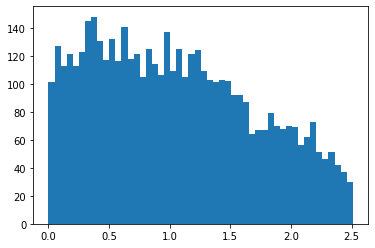

In [119]:
plt.hist(x_c, 50)
plt.show()

In [161]:
params = ((1, 0.2, 2), (1, 0.2, 4), (2, 0.2, 4), (2, 1, 4)) # n, m, k

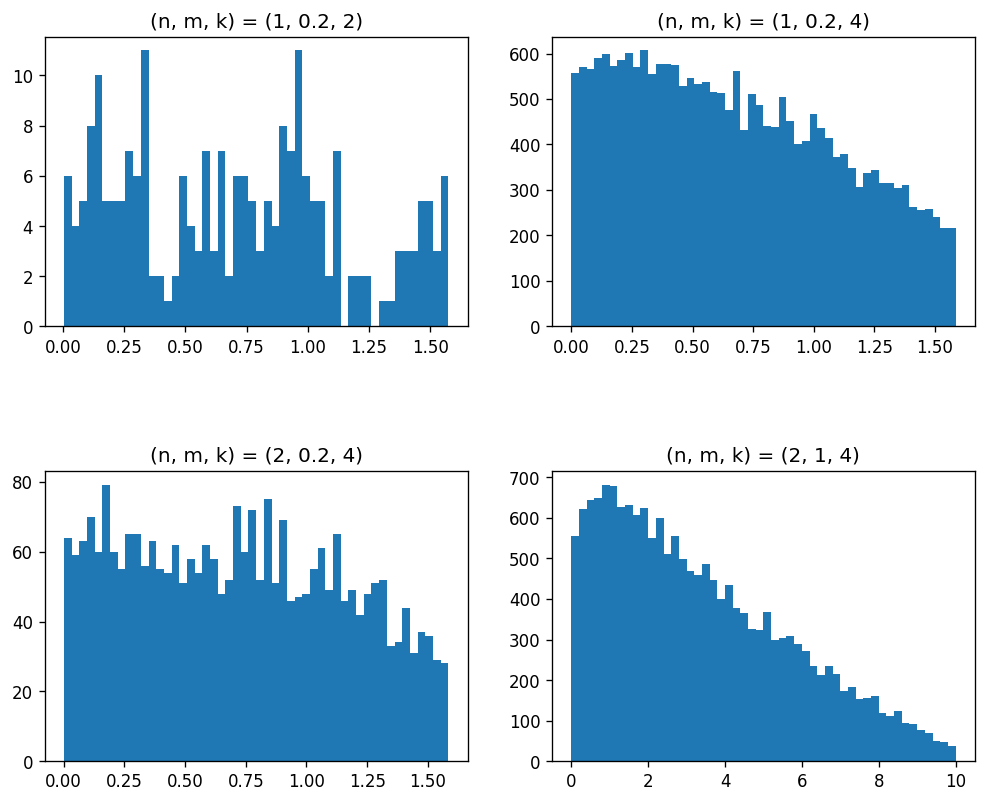

In [162]:
fig = plt.figure(figsize=(10, 8), dpi=120)
for par, i in zip(params, range(len(params))):
    n,m,k = par
    N = int(10**(k+1))
    h = 10**(m)
    S = 1
    S_c = 10**(-n)
    nr, nd, x_c = eval_neutr(N, h, S_c)
    plt.subplot(2, 2, i+1)
    plt.hist(x_c, 50)
    plt.title("(n, m, k) = ({}, {}, {})".format(n, m, k))
fig.subplots_adjust(hspace=0.5)
plt.show()